In [13]:
pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 3.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Customer Lifetime (LT): 100.53 days
Customer Lifetime Value (LTV): $164.86

--- MRR ---


,month,MRR
0,2022-03,1490.52
1,2022-04,3600.36
2,2022-05,4339.41
3,2022-06,5170.86
4,2022-07,6791.55
5,2022-08,7616.94
6,2022-09,7922.40
7,2022-10,9343.86
8,2022-11,8424.99
9,2022-12,8439.78



--- Paid Users ---


,month,Paid Users
0,2022-03,43
1,2022-04,73
2,2022-05,100
3,2022-06,111
4,2022-07,145
5,2022-08,165
6,2022-09,179
7,2022-10,199
8,2022-11,188
9,2022-12,189



--- ARPPU ---


,month,MRR,Paid Users,ARPPU
0,2022-03,1490.52,43,34.663256
1,2022-04,3600.36,73,49.320000
2,2022-05,4339.41,100,43.394100
3,2022-06,5170.86,111,46.584324
4,2022-07,6791.55,145,46.838276
5,2022-08,7616.94,165,46.163273
6,2022-09,7922.40,179,44.259218
7,2022-10,9343.86,199,46.954070
8,2022-11,8424.99,188,44.813777
9,2022-12,8439.78,189,44.654921



--- New Paid Users ---


,month,New Paid Users
0,2022-03,43
1,2022-04,41
2,2022-05,40
3,2022-06,27
4,2022-07,44
5,2022-08,50
6,2022-09,38
7,2022-10,41
8,2022-11,27
9,2022-12,32



--- New MRR ---


,month,New Paid Users,New MRR
0,2022-03,43,1490.52
1,2022-04,41,3600.36
2,2022-05,40,4339.41
3,2022-06,27,5170.86
4,2022-07,44,6791.55
5,2022-08,50,7616.94
6,2022-09,38,7922.40
7,2022-10,41,9343.86
8,2022-11,27,8424.99
9,2022-12,32,8439.78



--- Churn Rate ---


,month,Churned Users,Paid Users,Churn Rate



--- Churned Revenue ---


,month,Previous MRR,MRR,Churned Revenue
0,2022-03,NaN,1490.52,NaN
1,2022-04,1490.52,3600.36,-2109.84
2,2022-05,3600.36,4339.41,-739.05
3,2022-06,4339.41,5170.86,-831.45
4,2022-07,5170.86,6791.55,-1620.69
5,2022-08,6791.55,7616.94,-825.39
6,2022-09,7616.94,7922.40,-305.46
7,2022-10,7922.40,9343.86,-1421.46
8,2022-11,9343.86,8424.99,918.87
9,2022-12,8424.99,8439.78,-14.79



--- Expansion MRR ---


,month,MRR,Expansion MRR
0,2022-03,1490.52,0.00
1,2022-04,3600.36,2109.84
2,2022-05,4339.41,739.05
3,2022-06,5170.86,831.45
4,2022-07,6791.55,1620.69
5,2022-08,7616.94,825.39
6,2022-09,7922.40,305.46
7,2022-10,9343.86,1421.46
8,2022-11,8424.99,0.00
9,2022-12,8439.78,14.79



--- Contraction MRR ---


,month,MRR,Contraction MRR
0,2022-03,1490.52,0.00
1,2022-04,3600.36,0.00
2,2022-05,4339.41,0.00
3,2022-06,5170.86,0.00
4,2022-07,6791.55,0.00
5,2022-08,7616.94,0.00
6,2022-09,7922.40,0.00
7,2022-10,9343.86,0.00
8,2022-11,8424.99,918.87
9,2022-12,8439.78,0.00


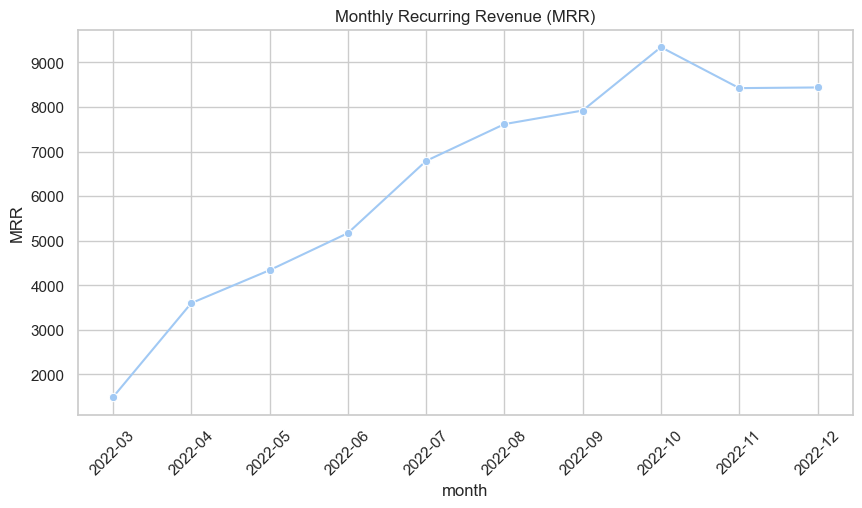

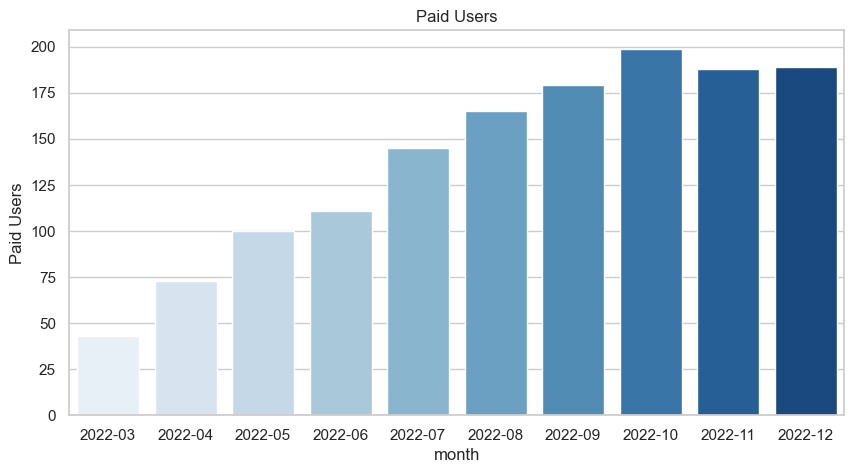

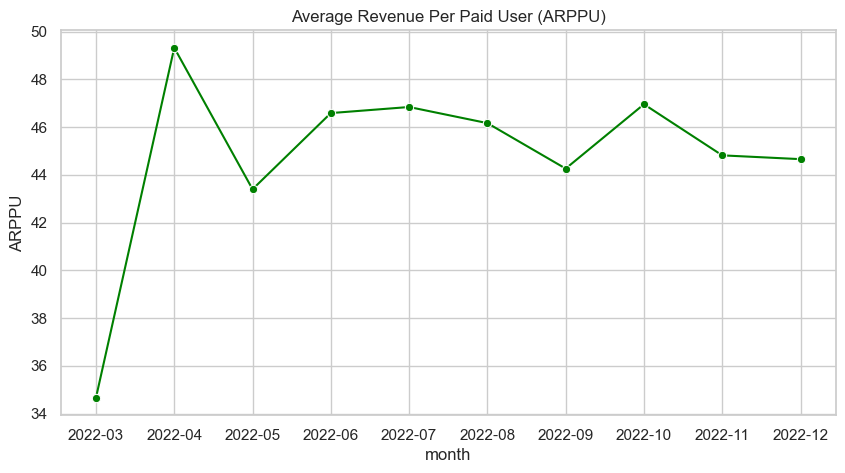

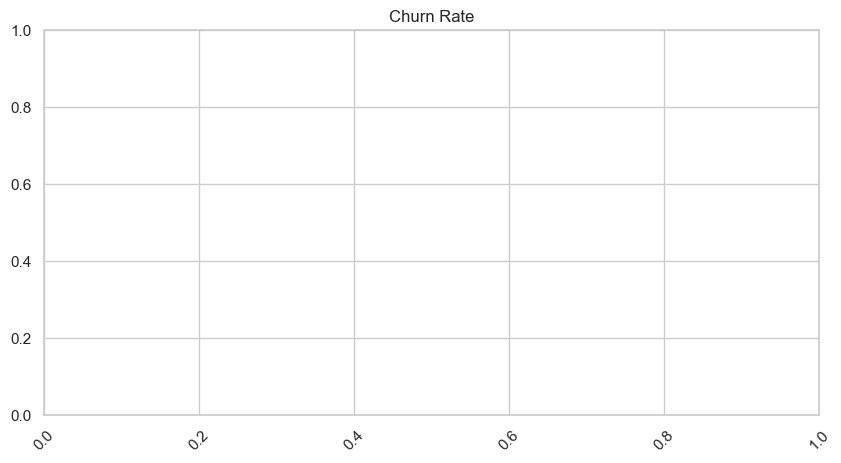

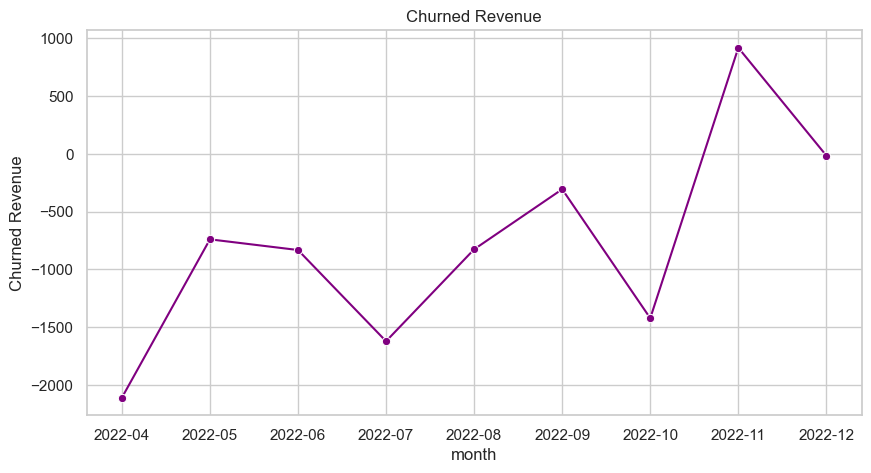

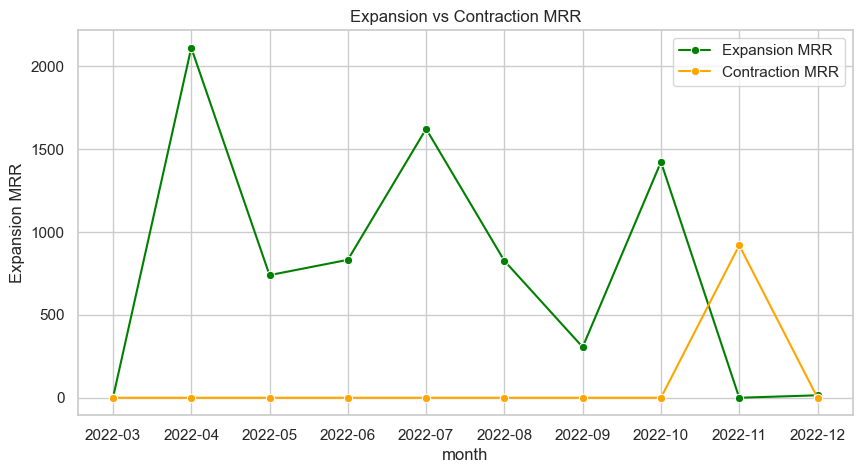

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Підключення до бази даних
DB_USER = 'da_one_estrela'
DB_PASSWORD = 'Pix3_VXuZ<LEK=)m'
DB_HOST = '35.198.109.135'
DB_PORT = '5432'
DB_NAME = 'ads_analysis_goit_course'

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Завантаження даних із таблиць
query_paid_users = "SELECT * FROM project.games_paid_users"
query_payments = "SELECT * FROM project.games_payments"

df_paid_users = pd.read_sql(query_paid_users, engine)
df_payments = pd.read_sql(query_payments, engine)

# Обробка дат
df_payments['payment_date'] = pd.to_datetime(df_payments['payment_date'])
df_payments['month'] = df_payments['payment_date'].dt.to_period('M')

# MRR — Monthly Recurring Revenue
mrr = df_payments.groupby('month')['revenue_amount_usd'].sum().reset_index()
mrr.columns = ['month', 'MRR']

# Перетворення типу колонки MRR
mrr['MRR'] = pd.to_numeric(mrr['MRR'], errors='coerce')

# Paid Users
paid_users = df_payments.groupby('month')['user_id'].nunique().reset_index()
paid_users.columns = ['month', 'Paid Users']

# ARPPU — Average Revenue Per Paid User
arppu = pd.merge(mrr, paid_users, on='month')
arppu['ARPPU'] = arppu['MRR'] / arppu['Paid Users']

# New Paid Users
first_payments = df_payments.groupby('user_id')['payment_date'].min().reset_index()
first_payments['month'] = first_payments['payment_date'].dt.to_period('M')
new_paid_users = first_payments.groupby('month')['user_id'].count().reset_index()
new_paid_users.columns = ['month', 'New Paid Users']

# New MRR
new_mrr = pd.merge(new_paid_users, mrr, on='month', how='left')
new_mrr.columns = ['month', 'New Paid Users', 'New MRR']

# Churned Users
previous_month_users = df_payments[['month', 'user_id']].drop_duplicates()
previous_month_users['month'] += 1
merged_users = pd.merge(previous_month_users, df_payments[['month', 'user_id']], on=['user_id'], how='left', suffixes=('_prev', '_curr'))
churned_users = merged_users[merged_users['month_curr'].isna()].groupby('month_prev')['user_id'].count().reset_index()
churned_users.columns = ['month', 'Churned Users']

# Churn Rate
churn_rate = pd.merge(churned_users, paid_users, on='month', how='left')
churn_rate['Churn Rate'] = churn_rate['Churned Users'] / churn_rate['Paid Users']*100


# Замінюємо пропущені значення нулями
churn_rate.fillna(0, inplace=True)


# Churned Revenue
previous_month_revenue = df_payments.groupby(['month', 'user_id'])['revenue_amount_usd'].sum().reset_index()
previous_month_revenue = previous_month_revenue.groupby('month')['revenue_amount_usd'].sum().shift(1).reset_index()
previous_month_revenue.columns = ['month', 'Previous MRR']

churned_revenue = pd.merge(previous_month_revenue, mrr, on='month')
churned_revenue['Churned Revenue'] = churned_revenue['Previous MRR'] - churned_revenue['MRR']

# Expansion MRR
expansion_mrr = mrr.copy()
expansion_mrr['Expansion MRR'] = mrr['MRR'].diff().apply(lambda x: x if x > 0 else 0)


# Contraction MRR
contraction_mrr = mrr.copy()
contraction_mrr['Contraction MRR'] = mrr['MRR'].diff().apply(lambda x: abs(x) if x < 0 else 0)

# Customer Lifetime (LT)
lt = df_payments.groupby('user_id')['payment_date'].agg(['min', 'max'])
lt['Customer Lifetime'] = (lt['max'] - lt['min']).dt.days
customer_lifetime = lt['Customer Lifetime'].mean()

# Customer Lifetime Value (LTV)
ltv = df_payments.groupby('user_id')['revenue_amount_usd'].sum().mean()

print(f"Customer Lifetime (LT): {customer_lifetime:.2f} days")
print(f"Customer Lifetime Value (LTV): ${ltv:.2f}")

# Відображення таблиць результатів
print("\n--- MRR ---")
display(mrr)

print("\n--- Paid Users ---")
display(paid_users)

print("\n--- ARPPU ---")
display(arppu)

print("\n--- New Paid Users ---")
display(new_paid_users)

print("\n--- New MRR ---")
display(new_mrr)

print("\n--- Churn Rate ---")
display(churn_rate)

print("\n--- Churned Revenue ---")
display(churned_revenue)

print("\n--- Expansion MRR ---")
display(expansion_mrr)

print("\n--- Contraction MRR ---")
display(contraction_mrr)

# Перетворення колонок 'month' на строки для побудови діаграм
columns_to_convert = [mrr, paid_users, arppu, new_paid_users, churn_rate, churned_revenue, expansion_mrr, contraction_mrr]
for df in columns_to_convert:
    df['month'] = df['month'].astype(str)

# Налаштування стилю
template_params = {'style': 'whitegrid', 'palette': 'pastel'}
sns.set(**template_params)

# Діаграма MRR
plt.figure(figsize=(10, 5))
sns.lineplot(data=mrr, x='month', y='MRR', marker='o')
plt.title("Monthly Recurring Revenue (MRR)")
plt.xticks(rotation=45)
plt.show()

# Діаграма Paid Users
plt.figure(figsize=(10, 5))
sns.barplot(data=paid_users, x='month', y='Paid Users', hue='month', palette='Blues', dodge=False)
plt.legend([], [], frameon=False)
plt.title("Paid Users")
plt.show()

# Діаграма ARPPU
plt.figure(figsize=(10, 5))
sns.lineplot(data=arppu, x='month', y='ARPPU', marker='o', color='green')
plt.title("Average Revenue Per Paid User (ARPPU)")
plt.show()

# Діаграма Churn Rate
plt.figure(figsize=(10, 5))
sns.barplot(data=churn_rate, x='month', y='Churn Rate', palette='Reds')
plt.title("Churn Rate")
plt.xticks(rotation=45)
plt.show()

# Діаграма Churned Revenue
plt.figure(figsize=(10, 5))
sns.lineplot(data=churned_revenue, x='month', y='Churned Revenue', marker='o', color='purple')
plt.title("Churned Revenue")
plt.show()

# Діаграма Expansion та Contraction MRR
plt.figure(figsize=(10, 5))
sns.lineplot(data=expansion_mrr, x='month', y='Expansion MRR', marker='o', label='Expansion MRR', color='green')
sns.lineplot(data=contraction_mrr, x='month', y='Contraction MRR', marker='o', label='Contraction MRR', color='orange')
plt.title("Expansion vs Contraction MRR")
plt.legend()
plt.show()
